### 2장 보충

##### 컨볼루션(convolution 연산):

입력 영상을 스캔하면서, 현재위치의 픽셀에 커널(마스크,필터, 윈도우)의 중심이 오도록 한 후,

커널의 범위내에 포함되는 이웃 픽셀을, 커널의 원소와 곱하여 현재 위치값 결정.

<U>커널의 값에따라 이미지를 흐리게(blurring), smoothing , 선명하게(sharpening) 만들 수 도 있다.</U>

커널은 보통 3,5,7,9.. 와 같이 홀수 크기를 갖는다.(?)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/convolution1.PNG" width="450" height="450">


위 와 같이 이미지와 커널을 컨볼루션 해야할 때. (1,1) 점에서 컨볼루션 하면. 커널의 중심을 (1,1)로 옮기고 각점마다 내적후 (1,1)에 합해준다.

후에, 다른점들도 똑같이 다 컨볼루션 해주면 된다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/convolution2.PNG" width="350" height="350">

```python
img_output(1,1) = img_input(0,0)*mask(0,0) +  img_input(0,1)*mask(0,1)
                  img_input(0,2)*mask(0,2) +  img_input(1,0)*mask(1,0)
                  img_input(1,1)*mask(1,1) +  img_input(1,2)*mask(1,2)
                  img_input(2,0)*mask(2,0) +  img_input(2,1)*mask(2,1)
                  img_input(2,2)*mask(2,2)
```
----

파이썬에서는 컨볼루션 연산을 함수로 지원해준다!

cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None)

    src : 입력영상
    ddepth : 출력영상 데이터 타입.(ex) cv2.CV_8U,cv2.CV_32F,cv2.CV_64F,-1
    -1을 지정하면 src와 같은 타입의 영상
    
    kernel : 커널(필터,마스크) 행렬, 실수형.
    
    anchor: 고정점 위치. (-1,-1)이면 필터 중앙을 고정점으로
    
    borderType : 가장자리 픽셀 확장방식


---
### smoothing 연산( Gaussian, median filter )

화소와 이웃화소의 차이를 줄여 평탄한 영상으로 만들어주는 연산.

##### - median filter (중앙값)
median 필터는 현재 화소에 커널을 씌우고, 그 화소들의 중앙값을 현재 화소에 결과로 취한다.

가우시안 필터에 비해 에지가 잘 보존된다.메디안 필터를 에지 보존(edge preserving) 스무딩 필터라고 부르기도 한다.

```
cv2.medianBlur(src, ksize, dst=None)

• src : 입력 영상. 각 채널 별로 처리됨 (컬러 이미지도 상관없다.)

• ksize : 커널 크기. 1보다 큰 홀수를 지정. 숫자 하나를 집어주면 됌

• dst : 출력 영상, src와 같은 크기, 같은 타입

```

##### - gaussian filter
컨볼루션 연산을 수행하면, 멀리있는 이웃들의 값도 현재값에 영향을 준다.

거리에따라 영향을 달리하기 위해, 2차원 가우시안 분포의 확률밀도값을 담은 필터를 사용한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/2dGaussian.PNG" width="350" height="350">


 필터 마스크 크기 = (8σ+ 1) 또는 (6σ+ 1) 홀수

```
cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None) 

• src: 입력 영상. 각 채널 별로 처리됨.

• dst: 출력 영상. src와 같은 크기, 같은 타입.

• ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨

• sigmaX: x방향 sigma.

• sigmaY: y방향 sigma. 0이면 sigmaX와 같게 설정.

• borderType: 가장자리 픽셀 확장 방식.
```

----
##### salt & pepper 잡음인경우 smoothing

데이터 전송중 발생하는 현상으로, 요즘에는 발생안한다.

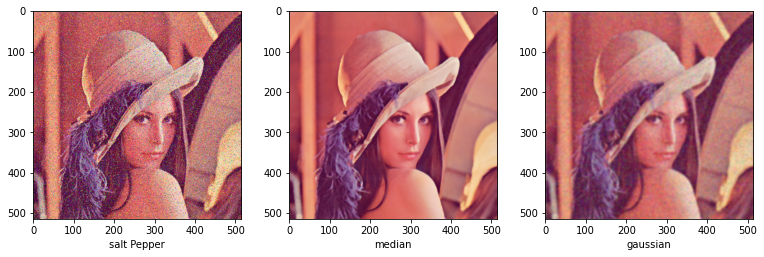

In [14]:
#salt &pepper 잡음인 경우 smoothing(median, gaussian)

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./data/saltpepper.png')#컬러 사진으로, 잡음 사진 읽기

median_img = cv2.medianBlur(img,5)# 커널크기 5
gaussian_img = cv2.GaussianBlur(img, (0, 0), 2)# (0,0)은 커널크기 자동설정, sigma_x,sigma_y = 1

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)# rgb 순서로 바꾸기
median_img=cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB)
gaussian_img=cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2RGB)


fig =plt.figure(figsize=(13,13))

plt.subplot(331)
plt.imshow(img)
plt.xlabel('salt Pepper')

plt.subplot(332)
plt.imshow(median_img)
plt.xlabel('median')

plt.subplot(333)
plt.imshow(gaussian_img)
plt.xlabel('gaussian')
plt.show()

# median 일때 가장 잘 없애고, gaussian은 edge가 옅어진다.

----
## 3장요약 - 에지 검출


## 3-1. 에지검출 기초

- 에지 : 영상의 명암, 컬러, 텍스처와 같은 특성이 급격히 변하는 지점. or 변화를 측정하고 가장 변화량이 큰곳.


### - 디지털 영상의 미분

- 1차원 영상에서 미분과 에지 검출
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate1.PNG" width="350" height="400">
이산공간에서 미분은 Δx 가 1일때 이다. 이는, 커널 (-1,1)을 컨볼루션 하는것과 같다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate2.PNG" width="350" height="400">
연산자를 바탕으로, 디지털 영상에서 엣지 화소를 찾아보자.

1. 영상 f를 미분한다.

2. 변화가 크면, f의 도함수도 크다. 임계값(threshold)을 4로 설정해 이진화한다.

3. 이진화 결과, 1을 갖는점을 에지 화소라 한다.

이렇게, edge를 찾는데 사용되는 연산자(커널)을 에지 연산자(edge operator)라 한다.

---
- 이계 도함수
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/2Dderivate.PNG" width="350" height="400">

이계도함수는 엣지가 여러 화소에서 걸쳐생기는 램프 에지를 찾기 위해서 사용된다.

---

- edge 모델과 연산자

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgeModel.PNG" width="450" height="600">

지금 edge 모델은  계단 애지(step edge), 램프 에지(ramp edge) 두가지 에지를 가진 영상이다. 그리고 이상적으로 잡음이 없다.

1. 영상 f에서 1계 도함수를 구한다.

2. 1계 도함수 결과, 계단 애지를 찾을 수 있다. 하지만, 램프 에지는 변화가 봉우리 형태로 걸쳐서 나타나 검출이 안된다.

3. 2계 도함수 결과, 부호가 교차되는 지점 영교차(zero crossing)이 검출된다. 그 지점에서 localization으로 에지의 정확한 위치를 찾아야한다.

---
- 현실적인 edge 모델

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate3.PNG" width="450" height="600">

현실에서는 잡음이 발생하여, 스무딩 연산을 적용해야한다.

그런데, 스무딩은 크기가 3x3 이상의 연산자를 사용하므로 1x2 크기의 연산자는 너무작다 (?)

그래서 Δx=2로 두어, 1x3 연산자로 만든다.


---


### - 2차원 영상 확장

위의 Δx=2의 도함수를 확장하여 그래디언트를 계산하면, 2차원으로 확장할 수 있다.

- 그래디언트 백터(gradient vector)와 연산자

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/2Dmask.PNG" width="450" height="600">

y방향의 3x1 에지마스크와 x방향의 1x3 에지 마스크를 구할 수 있다.

하지만, 현실적으로는 3x1 크기로는 잡음에 대처할 수 없다.(주변의 두 픽셀만 반영이 되기 때문에 )

---
- 정방형 연산자

그래서 정방형으로 확장하여, 연산자 자체가 스무딩 효과를 지니도록 설계

##### 프레윗 연산자 (Prewitt operator)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/prewitt.PNG" width="300" height="400">


x방향의 미분인 M.x를 보면, 해당 행뿐만 아니라 그 아래와 윗 행가지 고려한다. 즉, 스무딩효과를 내포한다.

M.y를 통해 수직엣지를 구할 수 있고, M.x를 통해 수평 엣지들을 구할 수 있다.

##### 소벨 연산자 (Sobel operator)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/sobel.PNG" width="300" height="400">

소벨 연산자는 가까운 화소에 더 큰 가중치를 준다.

---
### - 애지 강도(edge magnitude)와 애지 방향(edge direction)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgeoperator.PNG" width="450" height="600">

1. 그래디언트는 dy,dx로 나타낸다.
2. 에지강도는 화소 (y,x)가 에지일 가능성 또는 신뢰도를 나타낸다.
3. 그래디언트 방향에 +90도 or -90도를 해준다면 에지 방향(edge direction)을 구할 수 있다.

엣지방향과 그래디언트 방향은 서로 수직이다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgeandgradient.PNG" width="450" height="600">
엣지방향과 그래디언트 방향과, 에지방향을 8방향 양자화한 그림.

에지방향의 각도를 구하면, 45도씩 양자화 시킬 수 있다.

(엣지방향과 그래디언트 방향은 왜 구하지??)


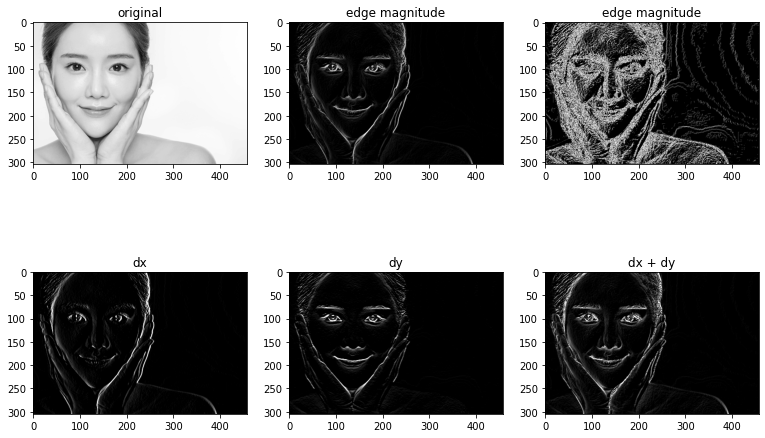

In [46]:
# EX) 소벨 마스크를 이용한 에지 검출. 에지와 관련된 맵들.
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./data/find_face.jpg",0) # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.

# 소벨 커널을 직접 생성해서 엣지 검출
## 소벨 커널 생성
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])


## 소벨 필터 적용
edge_dx = cv2.filter2D(img, -1, gx_k)
edge_dy = cv2.filter2D(img, -1, gy_k)

fig =plt.figure(figsize=(13,13))

plt.subplot(331)# 3행 3열중 1번째
plt.imshow(img,'gray')# 원본
plt.title('original')


#에지 강도 계산??
plt.subplot(332)
#plt.imshow(np.sqrt(np.square(edge_dx)+np.square(edge_dy)).astype(np.float32) ,'gray')
plt.imshow(cv2.magnitude(edge_dx.astype(np.float32),edge_dy.astype(np.float32)) ,'gray')# edge magnitude 계산.
plt.title('edge magnitude')

plt.subplot(333)
plt.imshow(np.sqrt(np.square(edge_dx)+np.square(edge_dy)).astype(np.float32) ,'gray')
plt.title('edge magnitude')


plt.subplot(334)# 3행 3열중 2번째
plt.imshow(edge_dx,'gray')# 수평 방향의 엣지
plt.title('dx')

plt.subplot(335)
plt.imshow(edge_dy,'gray')# 수직 방향의 엣지
plt.title('dy')

plt.subplot(336)
plt.imshow(edge_dx+edge_dy,'gray')# 수직 방향의 엣지
plt.title('dx + dy')


plt.show()

#소벨 필터의 결과 dx와 dy를 구할 수 있다.
#이를 통해, 그래디언트와 에지방향등을 구할 수 있다.

#머리카락을 보면, dx는 수평방향의 엣지를, dy는 수직방향의 엣지들을 찾는다.
#edge magnitude 계산시, 바깥 경계가 가장 진하게 표현됨.

In [54]:
cv2.magnitude(edge_dx.astype(np.float32),edge_dy.astype(np.float32))

array([[0., 0., 0., ..., 4., 0., 0.],
       [0., 1., 3., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 2., 8., ..., 1., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
edge_dx+edge_dy

array([[0, 0, 0, ..., 4, 0, 0],
       [0, 1, 3, ..., 2, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 2, 8, ..., 1, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [55]:
np.sqrt(np.square(edge_dx)+np.square(edge_dy))

array([[0., 0., 0., ..., 4., 0., 0.],
       [0., 1., 3., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 2., 8., ..., 1., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

---

## 3-2. 영교차 이론 (Zero crossing)

Marr-Hilderth 에지 검출의 과정으로, 2차 미분을 통해 영교차를 찾아서, 에지를 검출한다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/Marr-Hildreth.PNG" width="450" height="600">




---
### - 가우시안과 다중 스케일 효과

- 에지 검출시 gaussian 필터를 사용하는 이유 1
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate_blur.PNG" width="450" height="600">

salt-pepper blur에서 2차 미분을 보면, 잡음의 값과 폭도 넓어짐을 볼 수 있다.

그래서, 미분 하기전에 가우시안으로 스무딩 전처리 과정이 필요하다.

---
- 에지 검출시 gaussian 필터를 사용하는 이유 2
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/multiscale.PNG" width="450" height="600">

가우시안 표준편차(σ) 를 조절해 다중-스케일(multi-scale)(???) 효과를 얻을 수 있다.

즉, σ를 크게하면 영상 디테일을 없애고 큰 물체의 에지만 검출, 작게하면 디테일에 해당하는 에지까지 검출.


---
### - LOG 필터 (Laplacian of Gaussian)

영상의 2차 미분을 라플라시안 연산을 통해 구한다. (sobel 두번을 하면 안되나? dx , dy)

라플라시안은 이차편도함수를 더한것이다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/laplacian.PNG" width="450" height="600">

영상 f를 가우시안 스무딩하고, 다시 라플라시안을 구한다면 계산 효율이 떨어진다.

또한, 가우시안을 이산 필터로 근사화, 라플라시안을 이산 필터로 근사화 한다. 근사화가 두번되어 오차가 커진다.

그래서, LOG 필터를 사용한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/logfilter.PNG" width="450" height="600">

컨볼루션과 라플라시안 연산 간 결합법칙이 성립한다.(??? 둘다 커널연산이라서?)

그래서, 가우시안 커널에 라플라시안을 연산하고, 영상과 컨볼루션 한 것이 LOG 필터이다.


이를 통해, Marr-Hilderth 에지 검출 과정을 2단계로 줄일 수 있다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/Marr-Hildreth2.PNG" width="450" height="600">

---
### - 영교차 검출 

LOG 필터를 적용해, 영상의 2차 미분을 구했다면 영교차를 검출해야한다.

1차원 영상처럼, +에서 - 로 0 이 교차되는 화소를 찾으면 잡음과 이산 공간 근사화로 인한 오차로 성능이 떨어진다.

그래서 주변화소들을 이용한다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/zerocrossing.PNG" width="450" height="600">

LOG 필터를 적용한 영상에서, 한 화소를 영교차 검출하기.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/zerocrossing2.PNG" width="450" height="600">

결과 영교차 화소이면, 1을 넣는다. 이진 영상이 된다.


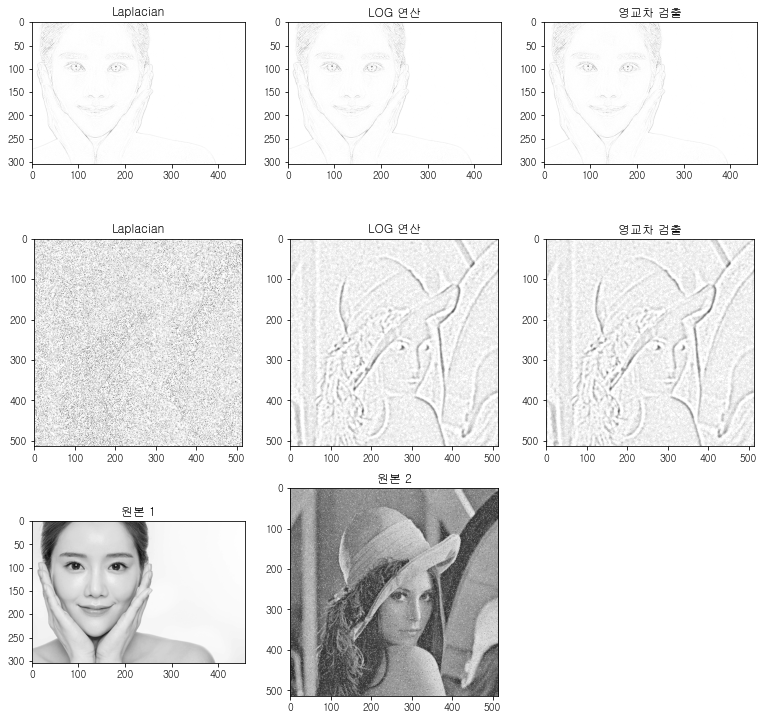

In [34]:
# EX) Marr-Hilderth 에지 검출 (LOG) 와 LAPLACIAN 커널 비교
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt


fig =plt.figure(figsize=(13,13))

img_blur = cv2.imread("./data/saltpepper.png",0)
img = cv2.imread("./data/find_face.jpg",0) # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.

#먼저, 라플라시안 커널을 생성하고 연산한다.
#https://marisara.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-openCV-19-%EC%97%90%EC%A7%80%EA%B2%80%EC%B6%9C-%EB%9D%BC%ED%94%8C%EB%9D%BC%EC%8B%9C%EC%95%88Laplacian-LoGLaplacian-of-Gaussian-DoGDifference-of-Gaussian?category=818751

mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian = cv2.filter2D(img, -1, mask1)

mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian_blur = cv2.filter2D(img_blur, -1, mask1)


# Marr-Hilderth 에지 검출
# https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/

#1. 영상을 가우시안 스무딩 한다.
gaussian_img = cv2.GaussianBlur(img, (0, 0), 2)
gaussian_img_blur = cv2.GaussianBlur(img_blur, (0, 0), 3)


#2. 라플라시안 연산을 한다.
log1 = cv2.filter2D(img, -1, mask1)
log2 = cv2.filter2D(gaussian_img_blur, -1, mask1)
#3. 영교차 검출.
# 또는 직접 가우시안 필터 계산



plt.subplot(331)
plt.imshow(255-laplacian,'gray')# laplacian 색 반전
plt.title('Laplacian')

plt.subplot(332)
plt.imshow(255-log1,'gray')# log 색 반전
plt.title('LOG 연산')

plt.subplot(333)
plt.imshow(255-log1,'gray')# log 색 반전
plt.title('영교차 검출')

##blur

plt.subplot(334)
plt.imshow(255-laplacian_blur,'gray')# laplacian 색 반전
plt.title('Laplacian')

plt.subplot(335)
plt.imshow(255-log2,'gray')# log 색 반전
plt.title('LOG 연산')

plt.subplot(336)
plt.imshow(255-log2,'gray')# log 색 반전
plt.title('영교차 검출')


plt.subplot(337)
plt.imshow(img,'gray')# log 색 반전
plt.title('원본 1')

plt.subplot(338)
plt.imshow(img_blur,'gray')# log 색 반전
plt.title('원본 2')



plt.show()


### 3-3. 캐니 에지 (Canny Edge)
에지 검출시 3가지 조건을 만족하여 최적화 해야한다.

1. 최소 오류율 : FP와 FN 최소. 실제 에지들만 검출되야하고, 에지를 못 찾으면 안된다. 

2. 위치 정확도 : 캐니 에지와 실제 이미지 에지 사이의 거리가 최소가 되야한다.

3. 에지 두께 : 실제 에지에 해당하는 곳에는 한 두께의 에지만 생성해야한다.

---
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/canny.PNG" width="450" height="600">

---
#### 과정2. edge magnitude 맵, edge 방향 맵 계산. 
케니는 가우시안에 1차 미분을 적용한 연산자가 최적임을 수학적으로 증명하였다.

하지만, 2차원에서는 그레디언트 방향을 구해야한다. 소벨 커널을 이용해 그래디언트 방향을 구하는 것으로 근사화 할 수 있다.

그레디언트를 구하면, edge magnitude를 구할 수 있다.

그레디언트 방향을 알면, edge 방향을 구해 양자화 할 수 있다.


---
#### 과정3. 비최대 억제(non-maximum suppression)
과정 2에서 구한 edge 맵은 두께가 두꺼워, 얇게 바꾸는 비최대 억제 단계가 필요하다.

이때 억제는 에지가 아닌것으로 결정하는 것.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/nonmaximum.PNG" width="450" height="600">

중앙 화소가 자신의 이웃보다 크지않으면 억제된다. 이때 이웃화소는 에지방향에 따른 두 화소다.

예를들어, 중앙화소의 에지 방향이 1 일때, (북동) (남서)보다 에지강도가 크면 에지가 된다.

지역 최대점만 에지로 검출하므로, 두께가 얇은 에지 영상이 생성된다.


---
#### 과정4. 이력 임계값(hystersis thresholding)

과정 3이 끝나면, FP가 많아진다.

해당 화소가 에지인지 검출하려면, 이전 화소들의 상태를 보면 알 수 있다.

케니 알고리즘은 두 임계값 T_low , T_high를 사용한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/hysteresis.jpg" width="450" height="600">

에지 추적은 T_high를 넘는 화소에서만 시작이되고, 시작화소가 정해지면 T_low 넘으면 모두 에지화소가 된다.



---
```
cv2.Canny(img, threshold1,threshold2 [, edges, apertureSize, L2gradient])

• img : 입력영상
• threshold1, threshold2 : 이력 스레시 홀딩에 사용할 최대,최소 값.
• apertureSize: 소벨 마스크에 사용할 커널 크기(???)
• L2gradient: 그레디언트 강도를 구할 방법
    - True : 유클리드 거리
    - False : 절대값 합

가우시안 시그마 조절은 안된다. 시그마=2.0 고정
```




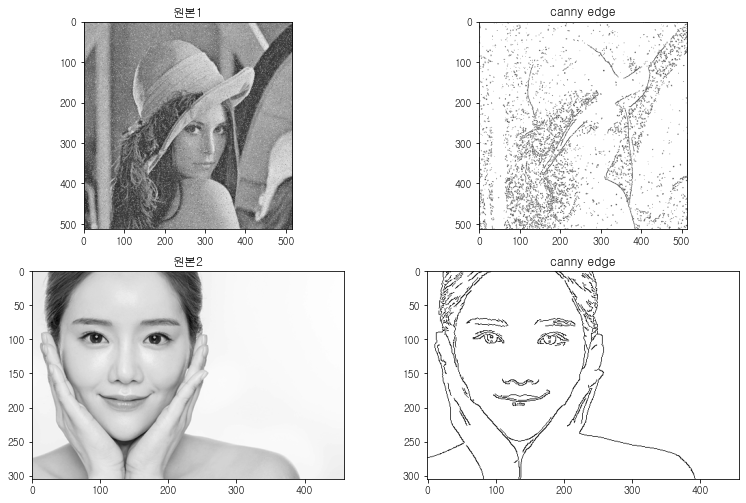

In [23]:
#ex) 케니 에지 검출.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt

# salt-pepper 이미지를 불러온다.
img_blur = cv2.imread('./data/saltpepper.png',0)

# 정상적인 이미지
img = cv2.imread('./data/find_face.jpg',0)


# canny 검출
img_edge = cv2.Canny(img_blur,300,400)
img_edge_normal = cv2.Canny(img,100,200)


fig =plt.figure(figsize=(13,13))

plt.subplot(321)
plt.imshow(img_blur,'gray')
plt.title('원본1')

plt.subplot(322)
plt.imshow(255-img_edge,'gray')#반전해준다.
plt.title('canny edge')

plt.subplot(323)
plt.imshow(img,'gray')
plt.title('원본2')

plt.subplot(324)
plt.imshow(255-img_edge_normal,'gray')#반전해준다.
plt.title('canny edge')

plt.show()


#정상적인 영상에서는 에지가 얇게 구해지는 것을 볼 수 있다.

## 3-4. 컬러 에지
명암 영상으로 바꾸고 검출해도 되지만, 컬러의 정보를 활용해 더 나은 품질의 에지를 검출할 수 도 있다.

#### 에지 OR 연산
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/colorEdge1.PNG" width="350" height="500">

각각의 채널에서 독립적으로 에지를 검출한 후, 그 결과 하나로 결합.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/colorEdge2.PNG" width="350" height="500">

하얀색은 셋다 같이 검출된 예. 하지만, 엣지 위치가 어긋나기도 한다.

만약 OR대신 평균을 낸다면, 셋다 같은 에지방향이면 에지강도를 강하게 해줘야 이치에 맞다.


#### Di Zenzo 방법.
그래서 Di zenzo는 새로 그레디언트를 정의했다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/dizenzo.PNG" width="350" height="500">



<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/dizenzo2.PNG" width="350" height="500">
좌측이 dizenzo 방법, 우측이 rgb 평균 일때

에지맵 강도가 dizenzo가 더 진한것을 볼 수 있다.


## 3-5. 선분 검출 (line segment) / 직선 검출
앞에서는 에지를 검출하는 여러가지 방법들.

응용을 위해서는 에지 토막(edge segment)로 만들어야 한다.

게다가 에지 토막을 직선으로 근사화하여 선분(직선 토막)(line segment)로 변환해야하는 응용이 많다.

### - 에지 연결과 선분 근사

0. edge 검출
1. 세선화를 통해 edge의 두께를 1로 만든다.
2. 에지 추적
3. 선분 근사 (직선으로 근사하여 선분(line segment)로 변환한다.)


#### 연결된 에지를 표현하는 방법.
에지 열 : 화소의 좌표를 순서대로 배열에 저장.(메모리 많이 소모)

체인 코드 : 시작점만 좌표로 표현하고, 그 이후는 0~7 방향 코드 표시

(이미지)

하지만, 두께가 1 이상인 에지에서는 에지 토막(edge segment)을 만드는데 혼란을 줄 수 있다.

그래서, 세선화 작업이 필요하다.

---
#### 세선화
canny detection에서 세선화시에, 에지강도와 에지 방향을 이용했지만, edge 이진영상만으로도 할 수 있다.

---
##### SPTA(Safe point Thinning Algorithm)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/spta1.PNG" width="350" height="500">

p를 에지로 남길지 결정하는 과정.

만약 이웃화소 n4가 0일때, 4개의 마스크중 어느 하나라도 매치가 안되면 제거 대상.

보통 에지 두께는 2~3이므로, SPTA 과정은 2번만 하면된다. 


#### 에지 토막(Edge segment)  검출, 추적
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetracing.PNG" width="350" height="500">
SPTA로 세선화된 영상에서 토막 추적을 위해, 분기점과 끝점을 알아내야한다.

##### 분기점, 끝점 수집
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetracing2.PNG" width="150" height="250">

화소의 주변 여덟 이웃중, 에지 화소를 나타낸것.

시계방향으로 조사한다고 할 때, 에지에서 비에지로 전환되는 곳을 화살표로 표시.

3번 이상이면 분기점, 1번이면 끝점으로 분류.

##### 에지 토막 (edge segment)추적
분기점, 끝점 에서 추적을 시작한다. 

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetracing3.PNG" width="350" height="500">

추가적으로, 전방 화소를 조사하는 규칙. 

dir 방향값에 따라, 전방화소 3개 또는 5개가 결정된다.

그리고 전방화소가  분기,끝점이 아니면 계속 segment에 추가한다.


#### 선분 근사

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgetoline.PNG" width="350" height="500">
예를들어, 위에서 검출한 에지토막 중 곡선이 있을때 양끝점을 직선으로 연결한다.

그리고 거리 h를 계산하여, threshold보다 크면 다시 두 토막으로 분할한다.

재귀적으로 threshold가 작을때 까지 분할한다.




---

### - 허프 변환 (Hough transform)
앞의 에지 연결은 에지를 잘 연결할 수 있는 상황을 전제로 한다.

현실에서는 연결관계가 명확하지 않거나, 잡음으로 인해 작은조각으로 끊어진 경우가 많다.

허프 변환은 연결 과정 없이 바로 직선을 찾아내는 방법이다.
 - 전체 공간을 조사하는 전역 연산(global operation)
 - 일종의 지각 군집화 (perceptual grouping): 사람들이 일직선상에 있다고 지각하는 점들을 한곳으로 모으는 원리 (근사)
 
---
#### 허프변환의 원리
간단하게 검출하는 방법을 생각하면

많은 edge 화소들이 있을때, 그 화소를 지나는 직선을 그린다.

이때 에지 3점 이상이 지난다면, 직선이 된다.

알고리즘으로 표현하면

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/houghxy.PNG" width="450" height="600">

1. 영상 공간(y-x)의 각각의 에지 화소(y_i,x_i)에 대해 (b-a)공간에서 b=-x_i*a+y_i 직선을 그린다.
2. 이때 (b-a) 공간에서 짙은 (b,a)를 추출한다.
3. y=ax+b 직선이 된다.

---
##### 문제점  1.  기울기 a가 무한대로 될경우

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/houghtheta.PNG" width="450" height="600">

직선의 방정식을 극좌표로 변환하여, 모든 에지화소의 x와 y를 대입하여 곡선을 그린다.

(r-theta)공간에서 짙은 (r,theta)를 찾으면 된다.

---
##### 문제점 2. 이산공간의  edge는 오류(오차)가 있다. 
ex) 실제 공간에서는 세 점이 직선이지만, edge 화소에서는 0.01.. 이런 차이로 직선이 아닐 수 있다.

(r, theta)공간을 양자화를 해주어 오류를 흡수하고, 누적배열(accumulation array)로 자취가 짙은 공간도 찾을 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/accumulation.PNG" width="450" height="600">

위 영상은, theta를 20도씩 r을 2씩 양자화 해주었다.

---

또한 hough transform은 clustering 알고리즘이다. 인라이어와 아웃라이어가 섞여있는 상황에서 인라이어 군집 찾는데도 사용.

---

```python
cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])

• image – 8bit, single-channel binary image, canny edge를 선 적용.
• rho – r 값의 범위 (0 ~ 1 실수) (양자화 정도)
• theta – 𝜃 값의 범위(0 ~ 180 정수) (양자화 정도)
• threshold – 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.

결과 line : [row, theta]

```



[[270.          1.5707964]]


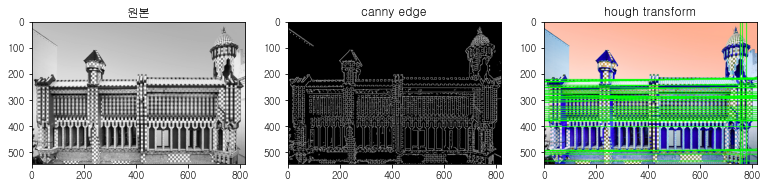

In [18]:
# 허프 변환 알고리즘
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt

#1.canny edge 검출
img = cv2.imread('./data/hough_example.jpg',0)
img_result = cv2.imread('./data/hough_example.jpg')
img_edge = cv2.Canny(img,300,400)

#2.hough transform 직선 검출

lines = cv2.HoughLines(img_edge,1,np.pi/180,200)
print(lines[0])

#3. 검출된 rho, theta로 직선 그리기
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho # x좌표가 rho * cos 이니까
        y0 = b*rho
        
        pt1= (int(x0+1000*(-b)),int(y0+1000*(a)) )# 직선의 시작은 영상의 처음 부분부터 
        pt2= (int(x0-1000*(-b)),int(y0-1000*(a)) )#영상의 끝까지 ? 
        
        cv2.line(img_result,pt1,pt2,(0,255,0),2)


fig =plt.figure(figsize=(13,13))

plt.subplot(331)
plt.imshow(img,'gray')
plt.title('원본')

plt.subplot(332)
plt.imshow(img_edge,'gray')
plt.title('canny edge')

plt.subplot(333)
plt.imshow(img_result)
plt.title('hough transform')

plt.show()


#threshold를 높여서, 비교적 덜 겹치는 세로선들은 많이 안나옴.

---
## RANSAC (Random sample consensus)

인라이어를 찾아, 모델을 적합 시키는 방법.

난수를 생성하여, 군집을 찾기에 임의성 지닌다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/ransac1.PNG" width="450" height="600">

y = ax+b 에서 a와 b를 추정해준다.

1. 난수를 생성하여 임의로 두 개의 샘플을 선택한다.
2. 두 점을 이용해서, a와 b를 계산한다.
3. y=ax+b와 오차 t안의 점들을, 인라이어에 추가.
4. 인라이어 수가 충분하지 않으면 모델을 버린다.
5. 채택된 모델은 다른 인라이어들과 적합오차를 계산해, 가장 좋은 모델을 찾는다.